<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Practica26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica #26: Validación, Evaluación y Selección

## 1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759)

# data (as pandas dataframes)
X = glioma_grading_clinical_and_mutation_features.data.features
y = glioma_grading_clinical_and_mutation_features.data.targets

# metadata
print(glioma_grading_clinical_and_mutation_features.metadata)

# variable information
print(glioma_grading_clinical_and_mutation_features.variables)


{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

## 2. 📊 Análisis exploratorio de datos (EDA)

In [ ]:
import pandas as pd

print("Análisis exploratorio de datos\n" , X.describe())
print(X.shape)
print(X.info())
print("Distribución de clases:\n", y.value_counts())

Análisis exploratorio de datos
            Gender  Age_at_diagnosis        IDH1        TP53        ATRX  \
count  839.000000        839.000000  839.000000  839.000000  839.000000   
mean     0.418355         50.935411    0.481526    0.414779    0.258641   
std      0.493583         15.702339    0.499957    0.492978    0.438149   
min      0.000000         14.420000    0.000000    0.000000    0.000000   
25%      0.000000         38.055000    0.000000    0.000000    0.000000   
50%      0.000000         51.550000    0.000000    0.000000    0.000000   
75%      1.000000         62.800000    1.000000    1.000000    1.000000   
max      1.000000         89.290000    1.000000    1.000000    1.000000   

             PTEN        EGFR         CIC       MUC16      PIK3CA  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.168057    0.133492    0.132300    0.116806    0.087008  ...   
std      0.374140    0.340309    0.339019    0.321380    0.282015  ...

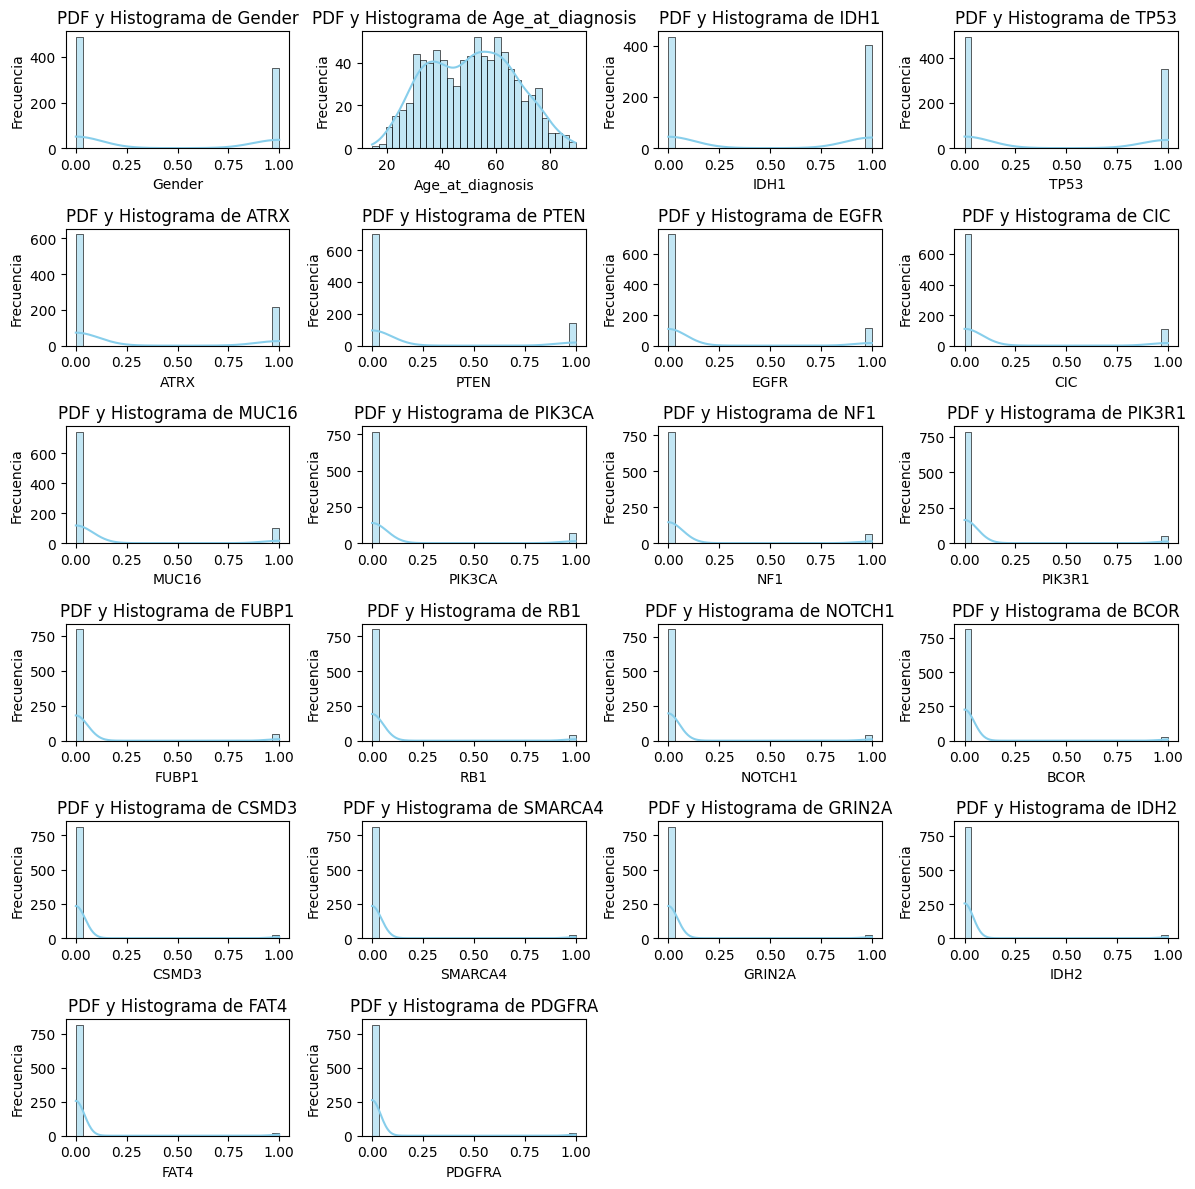

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una lista de las columnas del dataset
columns = X.select_dtypes(include=['float64', 'int64']).columns

# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(6, 4, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(X[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

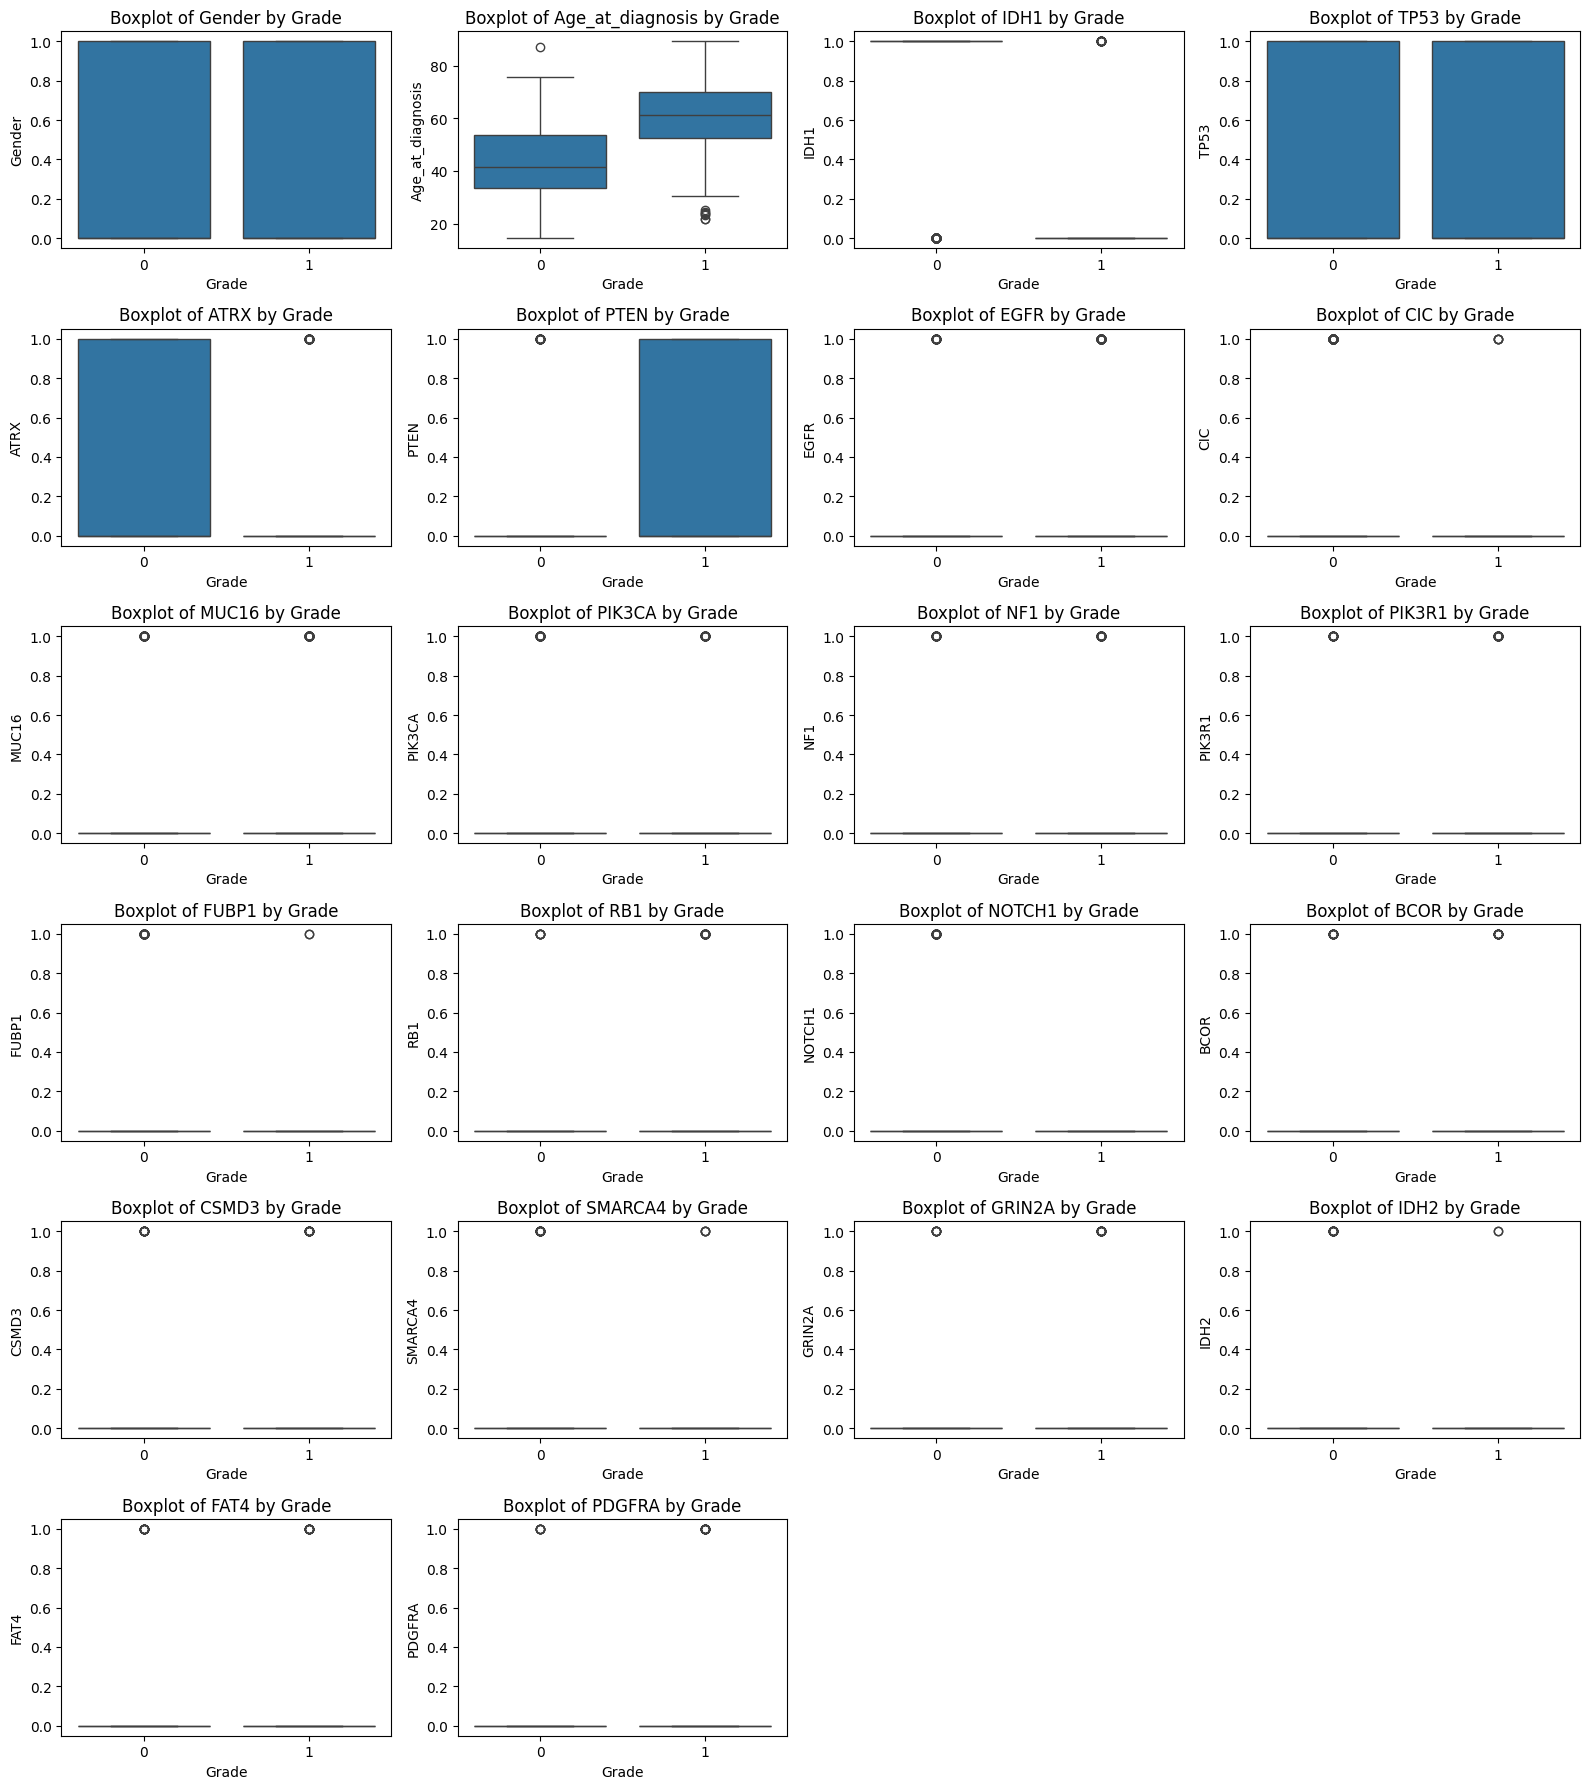

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine features and target for plotting by class
df_combined = X.copy()
df_combined['Grade'] = y

# Select only numerical columns from the original features (excluding 'Grade' from X if it existed)
numeric_columns = X.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for the subplot grid
num_features = len(numeric_columns)
num_cols = 4  # You can adjust this number
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 4, num_rows * 3))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df_combined, x='Grade', y=col)
    plt.title(f'Boxplot of {col} by Grade')
    plt.xlabel('Grade')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Matriz de correlación:
                    Gender  Age_at_diagnosis      IDH1      TP53      ATRX  \
Gender            1.000000         -0.016337  0.048282  0.002022  0.056376   
Age_at_diagnosis -0.016337          1.000000 -0.568892 -0.315863 -0.418411   
IDH1              0.048282         -0.568892  1.000000  0.340995  0.454920   
TP53              0.002022         -0.315863  0.340995  1.000000  0.546903   
ATRX              0.056376         -0.418411  0.454920  0.546903  1.000000   
PTEN             -0.032233          0.259421 -0.394862 -0.067829 -0.185397   
EGFR             -0.034497          0.227660 -0.357217 -0.173952 -0.159805   
CIC               0.061063         -0.122851  0.320696 -0.278753 -0.174403   
MUC16             0.015054          0.089834 -0.097956  0.017712  0.005535   
PIK3CA           -0.004629          0.050064 -0.052062 -0.071061 -0.085766   
NF1              -0.009179          0.103638 -0.213506 -0.078449 -0.083634   
PIK3R1           -0.055052          0.091

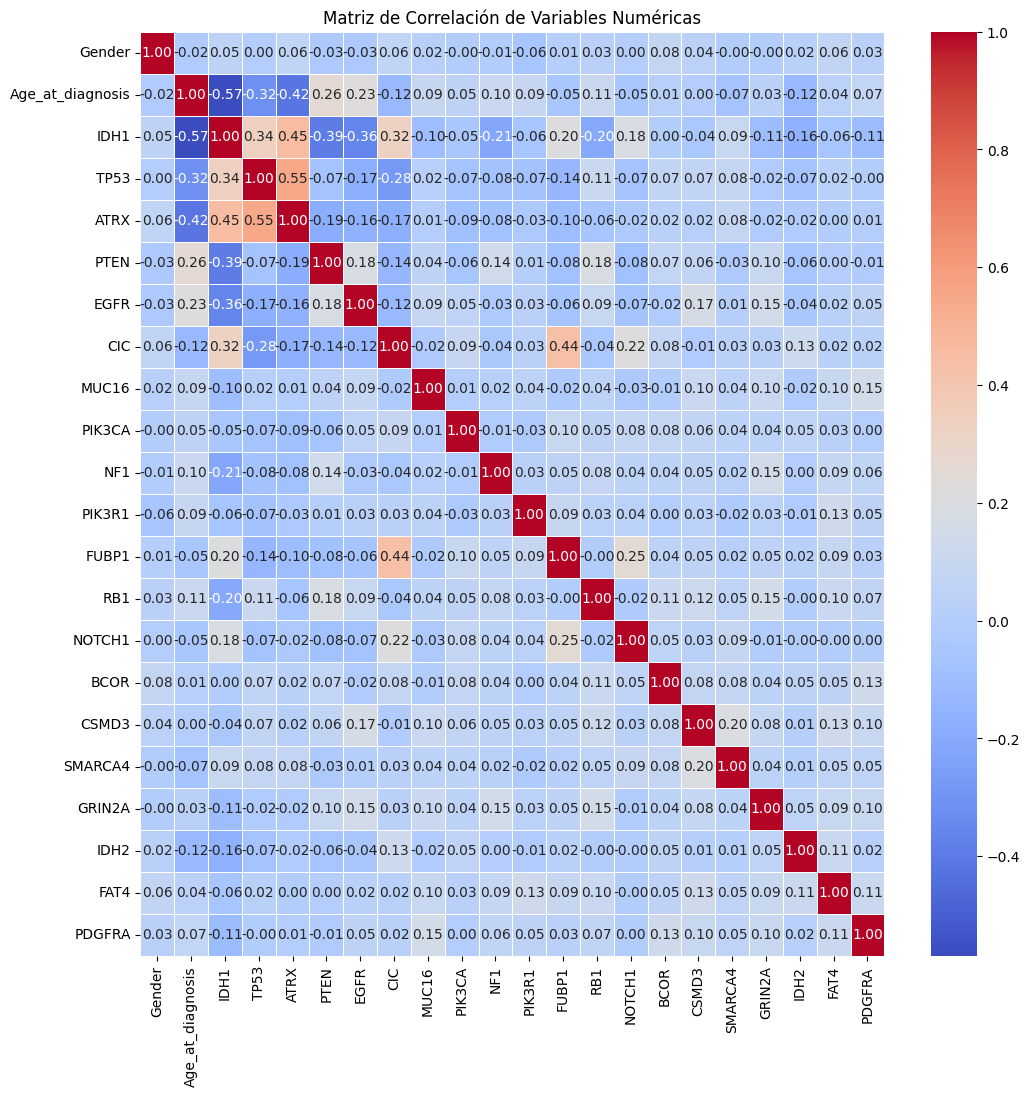

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = X.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## 3. Gráfica de Errores en Entrenamiento y Prueba

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Profundidad: 2
Resultados:
accuracy: 0.8677
precision_macro: 0.8676
recall_macro: 0.8762
f1_macro: 0.8665
Profundidad: 5
Resultados:
accuracy: 0.8617
precision_macro: 0.8608
recall_macro: 0.8680
f1_macro: 0.8602
Profundidad: 3
Resultados:
accuracy: 0.8689
precision_macro: 0.8690
recall_macro: 0.8776
f1_macro: 0.8678
Profundidad: 10
Resultados:
accuracy: 0.8236
precision_macro: 0.8221
recall_macro: 0.8237
f1_macro: 0.8202
Profundidad: 15
Resultados:
accuracy: 0.7998
precision_macro: 0.7985
recall_macro: 0.7954
f1_macro: 0.7942
Profundidad: 20
Resultados:
accuracy: 0.8021
precision_macro: 0.8010
recall_macro: 0.7972
f1_macro: 0.7964
Profundidad: 25
Resultados:
accuracy: 0.8021
precision_macro: 0.8013
recall_macro: 0.7976
f1_macro: 0.7965
Profundidad: 30
Resultados:
accuracy: 0.8021
precision_macro: 0.8013
recall_macro: 0.7976
f1_macro: 0.7965
Profundidad: None
Resultados:
accuracy: 0.8021
precision_macro: 0.8013
recall_macro: 0.7976
f1_macro: 0.7965
              precision    recall  f1-

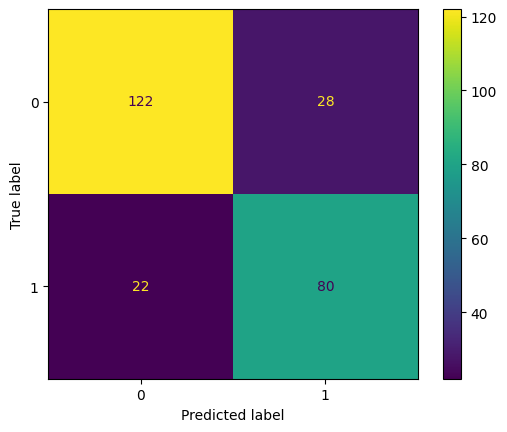

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

depths = [2, 5, 3, 10, 15, 20, 25, 30, None]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='gini',max_depth=d, random_state=42)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)
    print(f"Profundidad: {d}")
    print("Resultados:")
    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")
clf_cv.fit(X_train, y_train)
### Paso 4: Evaluar rendimiento

y_pred = clf_cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_cv.classes_)
disp.plot()
plt.show()

Profundidad: 2
Resultados:
accuracy: 0.8689
precision_macro: 0.8693
recall_macro: 0.8778
f1_macro: 0.8678
Profundidad: 5
Resultados:
accuracy: 0.8630
precision_macro: 0.8616
recall_macro: 0.8699
f1_macro: 0.8615
Profundidad: 3
Resultados:
accuracy: 0.8689
precision_macro: 0.8695
recall_macro: 0.8782
f1_macro: 0.8679
Profundidad: 10
Resultados:
accuracy: 0.8189
precision_macro: 0.8162
recall_macro: 0.8179
f1_macro: 0.8143
Profundidad: 15
Resultados:
accuracy: 0.8045
precision_macro: 0.8004
recall_macro: 0.8002
f1_macro: 0.7993
Profundidad: 20
Resultados:
accuracy: 0.8009
precision_macro: 0.7967
recall_macro: 0.7959
f1_macro: 0.7955
Profundidad: 25
Resultados:
accuracy: 0.8009
precision_macro: 0.7969
recall_macro: 0.7947
f1_macro: 0.7950
Profundidad: 30
Resultados:
accuracy: 0.7997
precision_macro: 0.7957
recall_macro: 0.7933
f1_macro: 0.7937
Profundidad: None
Resultados:
accuracy: 0.7997
precision_macro: 0.7957
recall_macro: 0.7933
f1_macro: 0.7937
              precision    recall  f1-

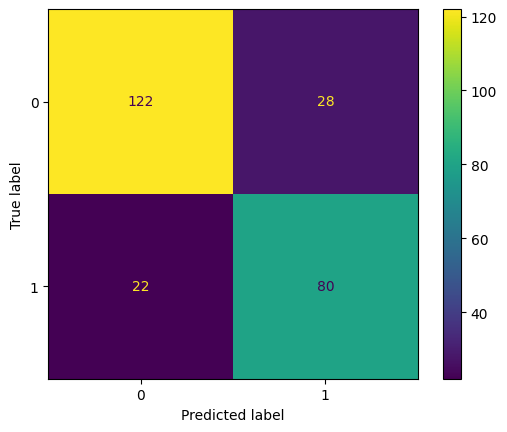

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

depths = [2, 5, 3, 10, 15, 20, 25, 30, None]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='gini',max_depth=d, random_state=42)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)
    print(f"Profundidad: {d}")
    print("Resultados:")
    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")
clf_cv.fit(X_train, y_train)
y_pred = clf_cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_cv.classes_)
disp.plot()
plt.show()

## 4. Optimización de hiperparámetros con RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),
    'min_samples_split': np.arange(2, 21, 1)
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_dist,
    n_iter=5,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


random_search.fit(X, y)

print("Mejores hiperparámetros encontrados:", random_search.best_params_)

print("Mejor score (f1_macro):", random_search.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Mejores hiperparámetros encontrados: {'min_samples_split': np.int64(11), 'max_depth': np.int64(18), 'criterion': 'entropy'}
Mejor score (f1_macro): 0.833152812329541


## 5. Optimización de hiperparámetros con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),
    'min_samples_split': np.arange(2, 21, 1)
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

print("Mejor score (f1_macro):", grid_search.best_score_)

Fitting 10 folds for each of 1748 candidates, totalling 17480 fits
Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': np.int64(5), 'min_samples_split': np.int64(11)}
Mejor score (f1_macro): 0.8641181174929005


## 6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),
    'min_samples_split': np.arange(2, 21, 1)
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search_accuracy = GridSearchCV(
    estimator=dtc,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_accuracy.fit(X, y)

print("Mejores hiperparámetros encontrados (Accuracy):", grid_search_accuracy.best_params_)

print("Mejor score (Accuracy):", grid_search_accuracy.best_score_)

Fitting 10 folds for each of 1748 candidates, totalling 17480 fits


KeyboardInterrupt: 

## 7. Optimización de hiperparámetros con GridSearchCV: accuracy

In [23]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dtc = DecisionTreeClassifier(random_state=42)

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),
    'min_samples_split': np.arange(2, 21, 1)
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search_accuracy = RandomizedSearchCV(
    estimator=dtc,
    param_distributions=param_dist,
    n_iter=5,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_accuracy.fit(X, y)

print("Mejores hiperparámetros encontrados (Accuracy):", random_search_accuracy.best_params_)

print("Mejor score (Accuracy):", random_search_accuracy.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Mejores hiperparámetros encontrados (Accuracy): {'min_samples_split': np.int64(11), 'max_depth': np.int64(18), 'criterion': 'entropy'}
Mejor score (Accuracy): 0.8379231210556511


##Actividad de reflexión y análisis
¿Cuál método encontró mejores hiperparámetros? **Para f1_macro:
RandomizedSearchCV el mejor score: 0.83315
GridSearchCV mejor score: 0.86412 en este caso GridSearchCV fue el mejor.**

¿Cuál fue más costoso computacionalmente? **el GridSearchCV fue el mas costoso**
